## DataFrame(df)

In [3]:
import pandas as pd
import numpy as np

Pandas DataFrame, 2 boyutlu bir array veya satırlar ve sütunlar içeren bir tablo gibi 2 boyutlu bir veri yapısıdır.

Series bir sütun gibidir, DataFrame tüm tablodur.yani df: n(series) 'dan oluşur.

Kendi df'imizi  de oluşturabiliriz hazır olan df'leri de kullanabiliriz : 

1- kendimiz nasıl df oluştururuz ?  pd.DataFrame() ile bunu yapabiliriz.

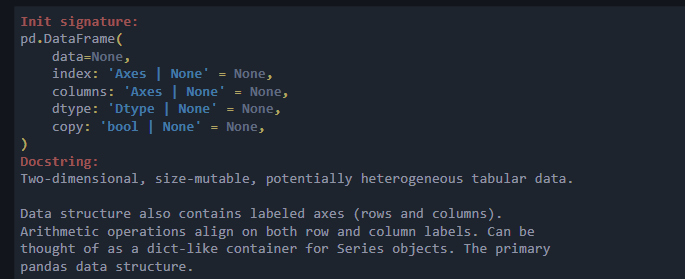

In [7]:
data = np.random.randint(1,101,(4,3))
data

array([[36, 23, 10],
       [71, 95, 27],
       [ 2, 28,  9],
       [11, 78, 67]])

In [8]:
df = pd.DataFrame(data)
df

,0,1,2
0,36,23,10
1,71,95,27
2,2,28,9
3,11,78,67


column'lar ve rowlar 0'dan başlayarak indexlendi buna dikkat edelim.

df[0] yaparsak column mu gelecek ilk satır mı?

In [10]:
df[0]

0    36
1    71
2     2
3    11
Name: 0, dtype: int32

In [11]:
df[1]

0    23
1    95
2    28
3    78
Name: 1, dtype: int32

** column  getirdi**

Peki ben sütun getirmek istemiyorum  istediğim satırı nasıl getireceğim ?

bunun için loc attribute'nu kullanacağız : (locate)

In [12]:
df.loc[1]    

0    71
1    95
2    27
Name: 1, dtype: int32

In [13]:
df.loc[0]   

0    36
1    23
2    10
Name: 0, dtype: int32

satırları da sütunları da demek ki alabiliyorum peki bize bunları ne olarak getiriyor yine bir df mi getiriyor bize ?

In [14]:
type(df[0])

pandas.core.series.Series

In [15]:
type(df.loc[0])  

pandas.core.series.Series

satırı da getirse sütunu da getirse bize bunları aslında pandas series olarak getiriyor,df'in oluşum şekline de uyuyor mantıken.

dict'ten df oluşturma:

In [56]:
data = {
  "mesafe(m)": [100,200,400],
  "süre": [15,32,58]
}

df = pd.DataFrame(data)                 
df           

,mesafe(m),süre
0,100,15
1,200,32
2,400,58


Hatırlarsak biz bir dict ile seri oluşturduğumuzda dict'imizin keyleri bizim labellarımız(index) oluyordu. Burada key'lerin column adları olduğuna ve rowlarında 0'dan başlayarak indexlendiğine dikkat edelim.

In [57]:
type(df)

pandas.core.frame.DataFrame

In [61]:
# df[0] hata verecek çünkü böyle bir sütun yok

In [60]:
df.loc[0]

mesafe(m)    100
süre          15
Name: 0, dtype: int64

In [63]:
df["süre"]

0    15
1    32
2    58
Name: süre, dtype: int64

## df' de labels(etiketleme)(indexleme)

df'de series'den farklı olarak column da label'ı olduğunu farkettik demekki ben etiketleme yaparken onu da değiştirebileceğim

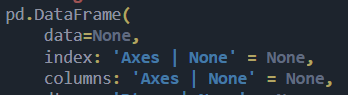

In [180]:
data = np.random.randint(1,101,(4,3))
data

array([[89, 51, 85],
       [40, 44, 38],
       [42, 48, 81],
       [90, 79, 85]])

In [181]:
label1= ["madrid","inter","liverpool","m.city"]
label2=["atılangol","yenilengol","puan"]

In [182]:
df = pd.DataFrame(data,index=label1, columns=label2)
df

,atılangol,yenilengol,puan
madrid,89,51,85
inter,40,44,38
liverpool,42,48,81
m.city,90,79,85


burada da etiketleme yapacağım satır ve sütunların sayısı ile labellarımın uzunluklarının aynı olması gerekiyor.columns=label1 , index=label2 yazarsam datamın satır,sütunuyla labellar uymadığından hata alacağım tamamen series gibi

In [24]:
# df = pd.DataFrame(data,index=label2, columns=label1)  
# df

In [183]:
df["puan"]

madrid       85
inter        38
liverpool    81
m.city       85
Name: puan, dtype: int32

In [184]:
df["atılangol"]

madrid       89
inter        40
liverpool    42
m.city       90
Name: atılangol, dtype: int32

df["madrid"] yaparsak bize hata verecek çünkü satırı getirmek için loc attribute'nu kullanıyorduk

In [65]:
# df["madrid"]   # böyle bir sütun yok diyor (KeyError)

In [185]:
df.loc["madrid"]

atılangol     89
yenilengol    51
puan          85
Name: madrid, dtype: int32

Series'de ben etiketlemeyi yapsam da arka planda indexleri 0'dan başlatıyordu: yani kısaca hatırlarsak:

In [186]:
a = ["ali","ahmet","veli","mehmet"]
b =["w","x","y","z"]

In [187]:
ps = pd.Series(data=a,index=b)
ps

w       ali
x     ahmet
y      veli
z    mehmet
dtype: object

ps["w"] nasıl ki bana ali'yi getiriyorsa;

In [188]:
ps["w"]

'ali'

aynı şekilde ps[0]  da ali'yi getiriyordu

In [189]:
ps[0]

'ali'

peki df'lerde durum nasıl önce df için kullandığımız data vs yeniden kopyalayalım:

In [190]:
data = np.random.randint(1,101,(4,3))
data

array([[98, 60, 62],
       [13, 95, 16],
       [10, 94, 52],
       [38, 55, 42]])

In [191]:
label1= ["madrid","inter","liverpool","m.city"]
label2=["atılangol","yenilengol","puan"]

In [192]:
df = pd.DataFrame(data,index=label1, columns=label2)
df

,atılangol,yenilengol,puan
madrid,98,60,62
inter,13,95,16
liverpool,10,94,52
m.city,38,55,42


In [193]:
df["atılangol"]

madrid       98
inter        13
liverpool    10
m.city       38
Name: atılangol, dtype: int32

In [194]:
# df[0]          #column için hayali bir indexleme yapMAMIŞ

satırlar için yapmış mı ona bakalım 

In [195]:
df.loc["inter"]

atılangol     13
yenilengol    95
puan          16
Name: inter, dtype: int32

In [196]:
# df.loc[1] satırlar için de yapmamış gibi duruyor

## AMA bunun için ayrı bir attribute var onu kullanabiliriz : df.iloc[] : (index'i esas alan location)

In [197]:
df.iloc[1]

atılangol     13
yenilengol    95
puan          16
Name: inter, dtype: int32

demek ki rowlar için aslında arka planda yine kendince bir indexleme yapmış

In [198]:
df.iloc[0]

atılangol     98
yenilengol    60
puan          62
Name: madrid, dtype: int32

Yukarıda dedik ki : satırı da getirse sütunu da getirse bize bunları aslında pandas series olarak getiriyor peki ben df olarak getirmesini istiyorsam ne yapacağım ?

In [199]:
df[["atılangol"]] # bir köşeli parantez daha kullanmam gerekiyor böyle bir durumda

,atılangol
madrid,98
inter,13
liverpool,10
m.city,38


In [200]:
df["atılangol"]

madrid       98
inter        13
liverpool    10
m.city       38
Name: atılangol, dtype: int32

In [201]:
type(df[["atılangol"]] )

pandas.core.frame.DataFrame

In [202]:
df.loc[["madrid"]]

,atılangol,yenilengol,puan
madrid,98,60,62


In [203]:
type(df.loc[["madrid"]])

pandas.core.frame.DataFrame

[  ] sayesinde df olarak alabildiğimize göre bizim birden fazla satır veya sütünu da getiriyor olabilmemiz lazım :

In [204]:
df[["atılangol","puan"]]

,atılangol,puan
madrid,98,62
inter,13,16
liverpool,10,52
m.city,38,42


In [205]:
df.loc[["madrid","liverpool"]]

,atılangol,yenilengol,puan
madrid,98,60,62
liverpool,10,94,52


# Oluşturduğumuz df'e column eklemek

In [206]:
df

,atılangol,yenilengol,puan
madrid,98,60,62
inter,13,95,16
liverpool,10,94,52
m.city,38,55,42


In [207]:
df["puan"]

madrid       62
inter        16
liverpool    52
m.city       42
Name: puan, dtype: int32

yeni bir sütun eklerken :  dictlerdeki  dict[olmayan key] = value pair'i bize hatırlarsak yeni bir key,value pair'ı oluşturuyordu buna benzer bir mantıkla df'lerde de yeni bir column ekleyebiliyoruz.

In [208]:
df["oynananmac"]=[4,5,6,7]

In [209]:
df

,atılangol,yenilengol,puan,oynananmac
madrid,98,60,62,4
inter,13,95,16,5
liverpool,10,94,52,6
m.city,38,55,42,7


df["oynanmac"]=[4,5,6,7]   listemizin satır sayısı kadar olduğuna dikkat edelim ya öyle olmasaydı ?

In [121]:
# df["galibiyet"]=[2,3,5] böyle olsaydı hata alacaktık

yeni bir column'u şöyle de ekleyebiliyoruz:

In [210]:
df["average"] = df["atılangol"] - df["yenilengol"]
df

,atılangol,yenilengol,puan,oynananmac,average
madrid,98,60,62,4,38
inter,13,95,16,5,-82
liverpool,10,94,52,6,-84
m.city,38,55,42,7,-17


## bir df'den column nasıl sileriz?

aşağıdaki kodu çalıştırdığımızda hata alacağız 

In [108]:
# df.drop("oynanmac")

bunun nedeni :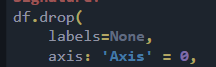   

görüldüğü üzere biz yukarıdaki kodu çalıştırdığımızda default olarak axis=0 olduğundan sileceğimiz şeyi rowlarda arıyor ben sütunda aramasını istiyorsam axis = 1 yapacağım.

In [211]:
df.drop("oynananmac",axis=1)

,atılangol,yenilengol,puan,average
madrid,98,60,62,38
inter,13,95,16,-82
liverpool,10,94,52,-84
m.city,38,55,42,-17


burdan anlayacağımız üzere rowlardan birini sileceksem ben df.drop("row") yazmam yeterli

In [212]:
df.drop("inter")

,atılangol,yenilengol,puan,oynananmac,average
madrid,98,60,62,4,38
liverpool,10,94,52,6,-84
m.city,38,55,42,7,-17


tekrar bir df'i çağıralım

In [213]:
df

,atılangol,yenilengol,puan,oynananmac,average
madrid,98,60,62,4,38
inter,13,95,16,5,-82
liverpool,10,94,52,6,-84
m.city,38,55,42,7,-17


görüldüğü üzere eklerken direk ekliyor ama silerken aslında df'in üzerinden silmiyor silince nasıl gözükür bize onu gösteriyor zira df.drop() bir attribute'tur, metot değildir ; biz eğer df'den gerçekten silmek istiyorsak df = df.drop() yapmalıyız

In [214]:
df = df.drop("oynananmac",axis=1)

In [215]:
df

,atılangol,yenilengol,puan,average
madrid,98,60,62,38
inter,13,95,16,-82
liverpool,10,94,52,-84
m.city,38,55,42,-17


In [216]:
df = df.drop("inter")

In [217]:
df

,atılangol,yenilengol,puan,average
madrid,98,60,62,38
liverpool,10,94,52,-84
m.city,38,55,42,-17


## 2.yolu: yani df = df.drop() gibi bir eşitleme yapmayacağız ama yine gerçekten de df üzerinden silme işlemini yapabileceğiz:

df.drop()' in içerisine bakarsak şöyle bir şey göreceğiz :

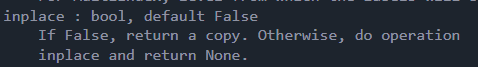

In [132]:
df          # inplace ----> yerinde yap

,atılangol,yenilengol,puan,average
madrid,46,32,48,14
liverpool,66,40,18,26
m.city,73,74,56,-1


In [218]:
df.drop("puan",axis=1,inplace=True)

In [219]:
df

,atılangol,yenilengol,average
madrid,98,60,38
liverpool,10,94,-84
m.city,38,55,-17


In [220]:
df.shape

(3, 3)

## ben row'u silmek istemiyorum  ama adını değiştirmek istiyorum ne yapacağım ?

In [221]:
df

,atılangol,yenilengol,average
madrid,98,60,38
liverpool,10,94,-84
m.city,38,55,-17


1-) df.reset_index() adı üzerinde indexleri resetliyor

In [222]:
df.reset_index() 

,index,atılangol,yenilengol,average
0,madrid,98,60,38
1,liverpool,10,94,-84
2,m.city,38,55,-17


index diye kendince bir column açtı ve bizim label1'imizi onun altında topladı ve sol tarafta da 0'dan ileriye doğru indexledi.

In [161]:
df

,atılangol,yenilengol,average
madrid,46,32,14
liverpool,66,40,26
m.city,73,74,-1


df yine değişmedi çünkü burada da df.drop() ile aynı mantık geçerli 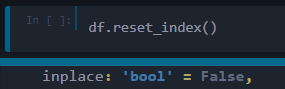


yani istersek inplace = True yapabiliriz.

In [223]:
df

,atılangol,yenilengol,average
madrid,98,60,38
liverpool,10,94,-84
m.city,38,55,-17


2-) ben  0'dan başlamasını istemiyorum indexlerin; yeni isimler koymak istiyorum:

In [224]:
new_indexlist = ["barcelona","chelsea","porto"]

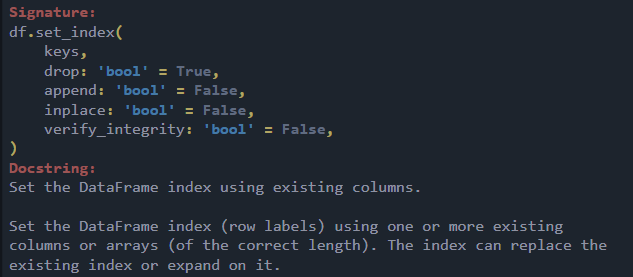

Docstring'ine bakarsak df.set_index()'in "Mevcut sütunları kullanarak DataFrame indexini ayarlayın."
yani ben new_indexlist'i doğrudan ser_index()'in içine gönderirsem hata alacağım çünkü df'im içerisinde böyle bir column yok

In [225]:
# df.set_index("new_indexlist")                  # set:ayarlamak

## Ama biz şunu yapabiliriz: olmasını istediğimiz yeni indexleri önce df ' me sütun olarak ekleriz sonra df.set_index()' e uygulamaya koyabilirim:

In [226]:
df

,atılangol,yenilengol,average
madrid,98,60,38
liverpool,10,94,-84
m.city,38,55,-17


In [227]:
df["index"] = new_indexlist

In [228]:
df

,atılangol,yenilengol,average,index
madrid,98,60,38,barcelona
liverpool,10,94,-84,chelsea
m.city,38,55,-17,porto


index labellı bir column oluşturmuş olduk yani artık mevcut bir column'um var

In [229]:
df.set_index("index")

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38
chelsea,10,94,-84
porto,38,55,-17


inplace =False defaultu burada da geçerli yine inplace = True ile değişiklik yapabiliriz.

In [230]:
df

,atılangol,yenilengol,average,index
madrid,98,60,38,barcelona
liverpool,10,94,-84,chelsea
m.city,38,55,-17,porto


In [231]:
df.set_index("index",inplace=True)

In [232]:
df

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38
chelsea,10,94,-84
porto,38,55,-17


In [233]:
df.loc["porto"]

atılangol     38
yenilengol    55
average      -17
Name: porto, dtype: int32

## bir satırdaki veya sütundaki spesifik bir değeri döndürme

python'dan bir hatırlatma:

In [135]:
a = ["kalem","klavye","pc"]

In [234]:
a[0][0]    
# yapabiliyordum yani a[0] bana bir daha indexlenebilen bir şey veriyorsa indexlemeye devam edebiliyordum. 

'a'

burada da aynı mantık geçerli : df.loc["row_name"] veya df["column_name"] bize series döndürüyordu ve biz series da da indexlemeye devam edebiliyoruz :

In [235]:
df

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38
chelsea,10,94,-84
porto,38,55,-17


In [236]:
df.loc["chelsea"]["atılangol"]

10

In [237]:
df["yenilengol"]["porto"]

55

bunu böyle yapabileceğimiz gibi burada şöyle de bir kolaylık var

In [238]:
df.loc["chelsea","atılangol"]

10

yani tek [  ] içerisine virgüllerle ayırarak indexleme yapabiliyoruz

In [239]:
df

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38
chelsea,10,94,-84
porto,38,55,-17


## conditions

In [240]:
df > 50

,atılangol,yenilengol,average
index,,,
barcelona,True,True,False
chelsea,False,True,False
porto,False,True,False


In [241]:
df[df>50]

,atılangol,yenilengol,average
index,,,
barcelona,98.0,60,NaN
chelsea,NaN,94,NaN
porto,NaN,55,NaN


In [242]:
df

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38
chelsea,10,94,-84
porto,38,55,-17


In [243]:
df["average"] >10

index
barcelona     True
chelsea      False
porto        False
Name: average, dtype: bool

In [244]:
df[df["average"]  > 10]

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38


In [245]:
df

,atılangol,yenilengol,average
index,,,
barcelona,98,60,38
chelsea,10,94,-84
porto,38,55,-17
